<a href="https://colab.research.google.com/github/vidya100804/DEEP-LEARNING-EXPERIMENTS/blob/main/MulticlassClassi_Exp_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [5]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000)
def vectorize_sequences(sequences, dimension=1000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
X_train = vectorize_sequences(X_train)
X_test = vectorize_sequences(X_test)
num_classes = np.max(y_train) + 1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [22]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(1000,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=700,
                    validation_split=0.2)
test_loss, test_acc = model.evaluate(X_test, to_categorical(y_test, num_classes))
print('test_acc:', test_acc)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.1444 - loss: 3.6301 - val_accuracy: 0.3823 - val_loss: 2.6467
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4003 - loss: 2.6727 - val_accuracy: 0.5392 - val_loss: 2.0121
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4873 - loss: 2.2021 - val_accuracy: 0.5748 - val_loss: 1.7533
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5352 - loss: 1.9606 - val_accuracy: 0.6144 - val_loss: 1.6117
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5677 - loss: 1.8189 - val_accuracy: 0.6572 - val_loss: 1.5163
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5944 - loss: 1.7034 - val_accuracy: 0.6811 - val_loss: 1.4513
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6243 - loss: 1.6177 - val_accuracy: 0.6889 - val_loss: 1.3987
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6267 - loss: 1.5719 - val_accuracy: 0.6950 - val_loss: 1.

Text(0, 0.5, 'Loss')

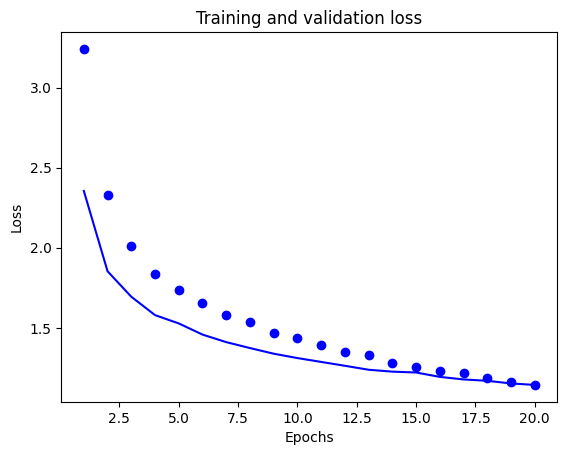

In [8]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

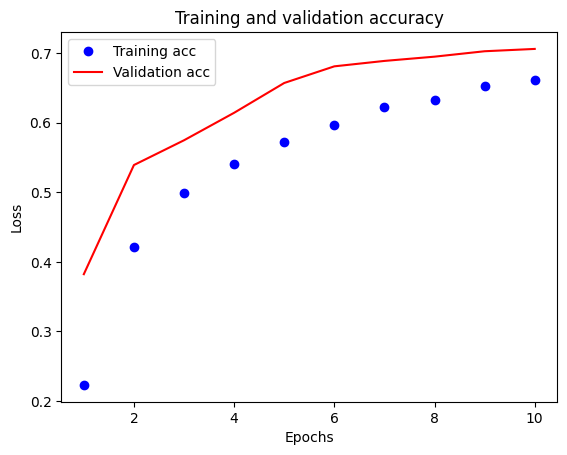

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [16]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:",cm)
report = classification_report(y_test, y_pred)
print("Classification Report:",report)


Confusion Matrix: [[ 0  5  0 ...  0  0  0]
 [ 0 87  0 ...  0  0  0]
 [ 0 13  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
Classification Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.42      0.83      0.56       105
           2       0.00      0.00      0.00        20
           3       0.88      0.95      0.91       813
           4       0.79      0.91      0.84       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.69      0.29      0.41        38
           9       0.68      0.52      0.59        25
          10       0.78      0.23      0.36        30
          11       0.43      0.80      0.56        83
          12       0.00      0.00      0.00        13
          13       0.40      0.22      0.28   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
